# Analysis of 2005 Taiwan Credit Card Dataset:
## Default Payments

From : https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

Business Questions:
- Given certain perameters, can a bank use known features of their clients to predict which clients are more likely to default on their credit card payment?
- Which characteristics indicate a given client is more likely to default on their credit payments?
- Which model is best to use making predictions for this particular dataset?
- What is the most important metric to consider when evaluating which model is 'best'?


Background info on credit defaults:
-  Default is the failure to repay a debt including interest or principal on a loan or security. A default can occur when a borrower is unable to make timely payments, misses payments, or stops making payments.
- The health of the credit card industry is best measured not by the number of people with cards, but rather the number who pay their bills. Bad payment habits begin by dinging you with more fees and lower credit scores, but can lead to lead to the loss of a vehicle or home, garnishment and even bankruptcy.
- Some demographic groups are more likely than others to miss bill payments: Generally, the younger the consumer group, the higher their delinquency rates.
- In America, 36% of millennial men 26% of millennial women report having defaulted or entered forbearance on their student loans.
    - Our analysis confirms these general findings. 
- The currency is New Taiwan dollars (NT); \\$100 NT was worth about $3.50 CAD in 2005.

In [2]:
#importing dataset and libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpl

In [3]:
import io

cc = pd.read_csv(r"C:\Users\eklas\OneDrive\Desktop\CSV\Credit_Default.csv", skiprows = 1) # gross first row
pd.options.display.max_rows = 10 #10 max rows so going forward it's not so messy to look at

cc.head() #showing first 5 rows here

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# What do these columns mean?

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default payment next month: Default payment (1=yes, 0=no)

In [4]:
# ID adds nothing, drop it like it's hot
cc.drop(['ID'], inplace = True, axis = 1)

In [5]:
# all-caps screaming at me. Too much screaming in the world right now. Let's not be animals.
# Map the capitalizing function to all column names
cc.columns = map(str.capitalize, cc.columns)

In [6]:
#show the columns now
cc.columns.tolist()

['Limit_bal',
 'Sex',
 'Education',
 'Marriage',
 'Age',
 'Pay_0',
 'Pay_2',
 'Pay_3',
 'Pay_4',
 'Pay_5',
 'Pay_6',
 'Bill_amt1',
 'Bill_amt2',
 'Bill_amt3',
 'Bill_amt4',
 'Bill_amt5',
 'Bill_amt6',
 'Pay_amt1',
 'Pay_amt2',
 'Pay_amt3',
 'Pay_amt4',
 'Pay_amt5',
 'Pay_amt6',
 'Default payment next month']

In [7]:
# Sex is antiquated, change that (to Gender) and Limit Bal (to Limit), 'Default payment next month' to 'Default'
cc=cc.rename(columns={'Sex':'Gender', 'Limit_bal':'Limit', 'Default payment next month':'Default'})

In [139]:
cc.head()

,Limit,Gender,Education,Marriage,Age,Pay_0,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
# Get some more info about the dataset. Knowledge is power !
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
Limit        30000 non-null int64
Gender       30000 non-null int64
Education    30000 non-null int64
Marriage     30000 non-null int64
Age          30000 non-null int64
Pay_0        30000 non-null int64
Pay_2        30000 non-null int64
Pay_3        30000 non-null int64
Pay_4        30000 non-null int64
Pay_5        30000 non-null int64
Pay_6        30000 non-null int64
Bill_amt1    30000 non-null int64
Bill_amt2    30000 non-null int64
Bill_amt3    30000 non-null int64
Bill_amt4    30000 non-null int64
Bill_amt5    30000 non-null int64
Bill_amt6    30000 non-null int64
Pay_amt1     30000 non-null int64
Pay_amt2     30000 non-null int64
Pay_amt3     30000 non-null int64
Pay_amt4     30000 non-null int64
Pay_amt5     30000 non-null int64
Pay_amt6     30000 non-null int64
Default      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [10]:
# not all of those make sense.

cc['Gender'] = cc['Gender'].astype('category')
cc['Education'] = cc['Education'].astype('category')
cc['Marriage'] = cc['Marriage'].astype('category')
cc['Default'] = cc['Default'].astype('category')

In [11]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
Limit        30000 non-null int64
Gender       30000 non-null category
Education    30000 non-null category
Marriage     30000 non-null category
Age          30000 non-null int64
Pay_0        30000 non-null int64
Pay_2        30000 non-null int64
Pay_3        30000 non-null int64
Pay_4        30000 non-null int64
Pay_5        30000 non-null int64
Pay_6        30000 non-null int64
Bill_amt1    30000 non-null int64
Bill_amt2    30000 non-null int64
Bill_amt3    30000 non-null int64
Bill_amt4    30000 non-null int64
Bill_amt5    30000 non-null int64
Bill_amt6    30000 non-null int64
Pay_amt1     30000 non-null int64
Pay_amt2     30000 non-null int64
Pay_amt3     30000 non-null int64
Pay_amt4     30000 non-null int64
Pay_amt5     30000 non-null int64
Pay_amt6     30000 non-null int64
Default      30000 non-null category
dtypes: category(4), int64(20)
memory usage: 4.7 MB


In [35]:
# how about the shape now shape of dataset
cc.shape

(30000, 24)

In [10]:
#let's check for null values.
cc.isnull().sum()/cc.shape[0]

#yippee, squeaky clean dataset, no nulls.

Limit_bal                     0.0
Sex                           0.0
Education                     0.0
Marriage                      0.0
Age                           0.0
                             ... 
Pay_amt3                      0.0
Pay_amt4                      0.0
Pay_amt5                      0.0
Pay_amt6                      0.0
Default payment next month    0.0
Length: 24, dtype: float64

In [11]:
# pretty print statement for nulls.

nulls = cc.isnull().sum()
nulls = nulls.sum()
# no nulls, 31 cols, great
print('\nThere are', cc.shape[0],'rows in the dataset')
print('There are', cc.shape[1],'columns (features) in the dataset')
print('There are {}'.format(nulls),'nulls in the dataset')

if nulls < 1:
    print("Booya")  #dumb
else:
    print("Imma isolate you null like you're coughing") #dumber


There are 30000 rows in the dataset
There are 24 columns (features) in the dataset
There are 0 nulls in the dataset
Booya


In [13]:
# Percentage of default and no default participants

count_no_default = len(cc[cc['Default']==0])
count_default = len(cc[cc['Default']==1])
pct_no_default = count_no_default/(count_no_default+count_default)*100
pct_of_default = count_default/(count_no_default+count_default)*100
print("Composition of the Dataset's Classes: \n")
print("Default: {:.1f}".format(pct_of_default), '%')
print("No Default: {:.1f}".format(pct_no_default), '%')
print("\nThis is an imbalanced dataset, with more instances in the positive class. \nKeeping in mind when we get to our Machine Learning portion, \nwe will opt to use the F1 score of the positive class as an evaluation metric.")

Composition of the Dataset's Classes: 

Default: 22.1 %
No Default: 77.9 %

This is an imbalanced dataset, with more instances in the positive class. 
Keeping in mind when we get to our Machine Learning portion, 
we will opt to use the F1 score of the positive class as an evaluation metric.


## Cleaning and exploring the data
In general, the numerical data was fine, but in the descriptions of the data, we see some potentially concerning things with
the categorical variables. We'll stick with cleaning those.

### Education

In [154]:
# looking at education entries to verify we stick to our range of values as defined above
# we do, but from our column definitions above, we know some of these values don't tell us anything about education, so are
# not useful in our analysis
cc['Education'].unique()
# Education: 4, 5, 6, 0 denote 'Other/Unknown'

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [155]:
# in this case, let's set all the unknown entries as the most frequent one, as that is the most likely case
# we could also just drop them
import statistics

cc['Education'] = cc['Education'].mask(cc['Education'] == 5, statistics.mode(cc['Education']))
cc['Education'] = cc['Education'].mask(cc['Education'] == 6, statistics.mode(cc['Education']))
cc['Education'] = cc['Education'].mask(cc['Education'] == 0, statistics.mode(cc['Education']))

In [156]:
# we now have no 0, 5, or 6's
cc['Education'].unique()

array([2, 1, 3, 4], dtype=int64)

In [157]:
# we can see where these values went
cc['Education'].value_counts() #2, being most frequent, went from 14030 to 14375

2    14375
1    10585
3     4917
4      123
Name: Education, dtype: int64

In [158]:
# alternatively, the proportion of these educational groups relative to the dataset is small, so we could just exclude them
#  from any analysis - for example, number 4 only has 0.4% of our data with 123 data points
cc['Education'].value_counts(normalize = True)

2    0.479167
1    0.352833
3    0.163900
4    0.004100
Name: Education, dtype: float64

In [18]:
# here, we set the low frequency, undefined, values to missing, so we don't erroneously include them in the '2' category
# I'll drop these vals once we get into ML portion

cc.loc[cc.Education == 0, 'Education'] = np.nan
cc.loc[cc.Education == 4, 'Education'] = np.nan
cc.loc[cc.Education == 5, 'Education'] = np.nan
cc.loc[cc.Education == 6, 'Education'] = np.nan

In [19]:
cc['Education'].value_counts(normalize = True) # now we have 100% in known education categories, with a low representation
#  of high-school educated

2.0    0.475078
1.0    0.358425
3.0    0.166497
Name: Education, dtype: float64

In [20]:
# Let's look at education in terms of our outcome variable, 'Default'
# so, almost 20% of grad-school attended people vs. about 25% of others default
# grad school has a protective factor against defaulting

cc['Default'].groupby(cc['Education']).value_counts(normalize = True)

Education  Default
1.0        0          0.807652
           1          0.192348
2.0        0          0.762651
           1          0.237349
3.0        0          0.748424
           1          0.251576
Name: Default, dtype: float64

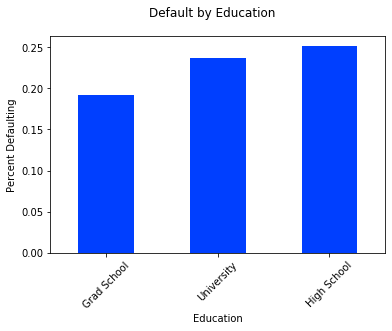

In [21]:
# plotting just the defaulting data, we see a trend in our data of more proportional defaults with a high school education

import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-bright')

prob = cc['Default'].groupby(cc['Education']).value_counts(normalize = True)

threshold = 0.3
mask = prob < threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]

prob.plot(kind='bar')
plt.suptitle('Default by Education')
plt.xlabel('Education')
plt.ylabel('Percent Defaulting')
plt.xticks([0,1,2],['Grad School','University','High School'],rotation=45)
plt.show()

In [22]:
# The highest percent defaults occured where education was High School, however there were many fewer records from High School 
#  educated individuals

cc['Default'].groupby(cc['Education']).value_counts()

# this dataset is unbalanced in many different ways, not just the most obvious where far more are in the negative (no default)
# class than the positive (default) class

Education  Default
1.0        0           8549
           1           2036
2.0        0          10700
           1           3330
3.0        0           3680
           1           1237
Name: Default, dtype: int64

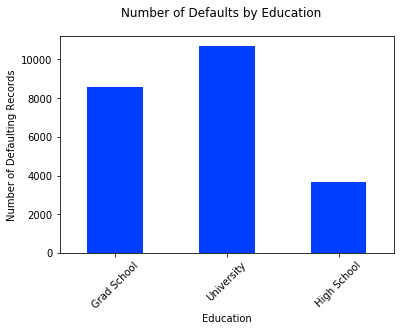

In [23]:
# In this plot, we can see how low the numbers are, relatively
# In order to do a proper prediction later, we will need to keep this in mind

edu_def = cc['Default'].groupby(cc['Education']).value_counts()

threshold = 3330
mask = edu_def > threshold
edu_def = edu_def.loc[mask]

edu_def.plot(kind='bar')
plt.suptitle('Number of Defaulters by Education')
plt.xlabel('Education')
plt.ylabel('Number of Defaulting Records')
plt.xticks([0,1,2],['Grad School','University','High School'],rotation=45)
plt.show()

### Marriage

In [24]:
# lot of unique marriage situations going on, no judgement, you do you

cc['Marriage'].unique()

array([1, 2, 3, 0], dtype=int64)

In [25]:
# but, according to the above description, marriage should have a range of 1-3, so the 0s are missing/

cc['Marriage'].value_counts()

2    15964
1    13659
3      323
0       54
Name: Marriage, dtype: int64

In [26]:
# because the number is so low, we can just remove these missing values. However, we should note that a disproportionate 
# number of these missing values are in the education category 'High School' for whatever reason
# We might also note that the 'others' category of marriage is relatively small, so making conclusions based on their data
# will likely skew our results
cc['Marriage'].groupby(cc['Education']).value_counts()

Education  Marriage
1.0        2           6809
           1           3722
           3             50
           0              4
2.0        2           7020
                       ... 
           0              6
3.0        1           2861
           2           1909
           3            103
           0             44
Name: Marriage, Length: 12, dtype: int64

In [27]:
# let's identify both '0' and 'other' groups from the marriage column as missing values for the current analysis

cc.loc[cc.Marriage == 0, 'Marriage'] = np.nan
cc.loc[cc.Marriage == 3, 'Marriage'] = np.nan
cc['Marriage'].value_counts()

2.0    15964
1.0    13659
Name: Marriage, dtype: int64

In [28]:
# ok, now lets see if there is any patterns to this data. And, surprisingly(?) there may be more proportional
#  default in married individuals.

cc['Default'].groupby(cc['Marriage']).value_counts(normalize = True)

Marriage  Default
1.0       0          0.765283
          1          0.234717
2.0       0          0.790717
          1          0.209283
Name: Default, dtype: float64

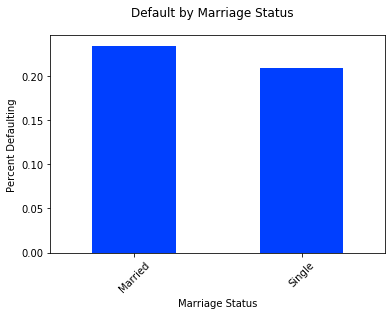

In [29]:
# graphically, we see a small difference in the proportions
mar_prob = cc['Default'].groupby(cc['Marriage']).value_counts(normalize = True)

threshold = 0.3
mask = mar_prob < threshold
#tail_prob = prob.loc[~mask].sum()
mar_prob = mar_prob.loc[mask]

mar_prob.plot(kind='bar')
plt.suptitle('Default by Marriage Status')
plt.xlabel('Marriage Status')
plt.ylabel('Percent Defaulting')
plt.xticks([0,1],['Married','Single'],rotation=45)
plt.show()

In [30]:
# 0 and 3 represent Other, so could alternatively should replace 0's with 3's 
# so that all the Others are in one giant beautiful Other soup (Em, I don't get this)

cc['Marriage']=np.where(cc['Marriage']==0, 3, cc['Marriage'])

In [31]:
cc['Default'].unique() # that's whats up

array([1, 0], dtype=int64)

### Age

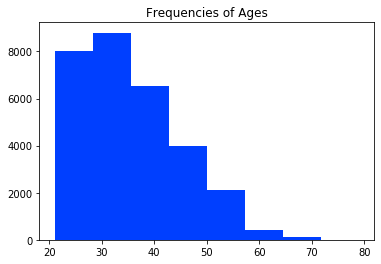

In [32]:
# lets's look at ages meow

# a histogram shows there is a right skew to our data
#  considering we only had 12 people in the over 71.75 ages (above), we may need to keep this in mind for later analysis
#  We could normalize, drop, or use robust measures to deal with this. We'll see.
plt.hist(cc['Age'], bins=8)
plt.title("Frequencies of Ages")
plt.show()

In [33]:
# this creates equally sized bins of ages
cc['Age_bins'] = pd.qcut(cc['Age'], q=8)

# these are the proportions of defaulters in each of the equally sized bins

cc['Default'].groupby(cc['Age_bins']).value_counts(normalize = True)

Age_bins        Default
(20.999, 25.0]  0          0.733402
                1          0.266598
(25.0, 28.0]    0          0.794302
                1          0.205698
(28.0, 31.0]    0          0.806498
                             ...   
(37.0, 41.0]    1          0.212973
(41.0, 47.0]    0          0.768951
                1          0.231049
(47.0, 79.0]    0          0.749583
                1          0.250417
Name: Default, Length: 16, dtype: float64

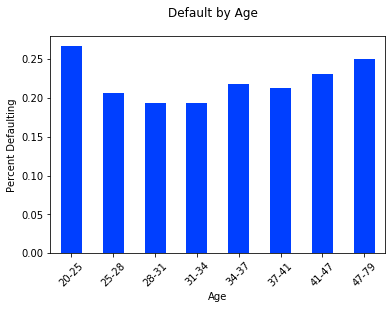

In [34]:
# this plots the proportions of defaulters in each of the 8 equal sized bins
# younger and older people seemed to default more
import matplotlib.pyplot as plt
age_prob = cc['Default'].groupby(cc['Age_bins']).value_counts(normalize = True)

threshold = 0.3
mask = age_prob < threshold
age_prob = age_prob.loc[mask]

age_prob.plot(kind='bar')
plt.suptitle('Default by Age')
plt.xlabel('Age')
plt.ylabel('Percent Defaulting')
plt.xticks([0,1,2,3,4,5,6,7],
           ['20-25','25-28','28-31','31-34','34-37','37-41','41-47','47-79'],rotation=45)
plt.show()

# Can see it's an inverted gaussian distrubtion 

In [42]:
#statistics.mean(cc['age']) will give us the actual mean and sd to compare with our calculations (yay, they match)
age_mean = statistics.mean(cc['Age'])
std_age = statistics.stdev(cc['Age'])

print("The mean age is {:.1f} with a standard deviation of {:.1f}.".format(age_mean, std_age))

The mean age is 35.5 with a standard deviation of 9.2.


### Gender

In [43]:
# the final of our descriptor variables is gender, which luckily has no missing values or outliers

cc['Gender'].value_counts()

2    18112
1    11888
Name: Gender, dtype: int64

In [44]:
# again, let's look at our proportions who defaulted
# males defaulted at 24% compared to females at 20%

cc['Default'].groupby(cc['Gender']).value_counts(normalize = True)

Gender  Default
1       0          0.758328
        1          0.241672
2       0          0.792237
        1          0.207763
Name: Default, dtype: float64

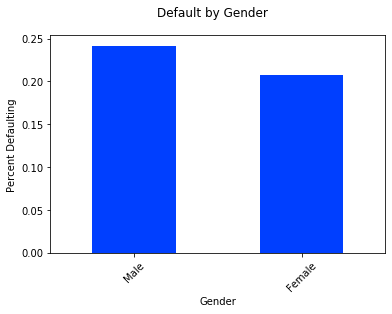

In [45]:
# graphically, this doesn't look any better for men

import matplotlib.pyplot as plt
age_prob = cc['Default'].groupby(cc['Gender']).value_counts(normalize = True)

threshold = 0.3
mask = age_prob < threshold
age_prob = age_prob.loc[mask]

age_prob.plot(kind='bar')
plt.suptitle('Default by Gender')
plt.xlabel('Gender')
plt.ylabel('Percent Defaulting')
plt.xticks([0,1],['Male','Female'],rotation=45)
plt.show()

 # Considering that about 22% of the customers will default, we see a couple of things:

# there are significantly more women than men
# men are most LIKELY to default the next month

### A Function: 

Separating out our payment status into unused/paid fully and use of credit/payment delays

Remember, Pay_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months...+). Let's separate out unused or paid fully (0) and use of credit/payment delays (1). 

In [14]:
# Now, to separate pmt status into unused or paid fully (0), and use of credit/pmt delays (1), 
# then count the number of pay delays.

def paydelay(value):
    if value > 0: # if it's 1 or above, denotes use of credit/pmt delays
        return 1
    else:
        return 0 # otherwise, unused/fully paid

In [15]:
# Implementing my paydelay function on the cols Pay_0 to Pay_6, 
# then creating a new column to show how many late pmts a client has made on aggregate

late_pmt = cc.loc[:, 'Pay_0':'Pay_6'].applymap(paydelay).sum(axis = 1) # map my function to cols
cc.insert(23, 'Late_Pmt', late_pmt) # Insert just before the Default col, will be interesting to see side by side.

In [48]:
# Let's see that shiny new col up against binary Default

cc[['Late_Pmt', 'Default']]

,Late_Pmt,Default
0,2,1
1,2,1
2,0,0
3,0,0
4,0,0
...,...,...
29995,0,0
29996,0,0
29997,3,1
29998,1,1


In [98]:
# Descriptive Analysis
pd.options.display.max_columns = 24 # letting loose, seeing all cols baybeeee
cc.describe()

,Limit,Gender,Education,Marriage,Age,Pay_0,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_amt1,...,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Late_Pmt,Default
count,30000.000000,30000.000000,29877.000000,29623.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.810289,1.538906,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.834200,0.221200
std,129747.661567,0.489129,0.694900,0.498492,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,1.554303,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,1.000000,0.000000
max,1000000.000000,2.000000,3.000000,2.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,6.000000,1.000000


## Descriptive Stats
 - average age is 35.5 and educated with just shy of a college degree.
 - youngest credit card holder is 21 y/o; oldest is 79 y/o, both of whom should be staying inside so as not to spread corona

- Avg credit limit is NT\\$167,484
  - highest credit limit is \\$100,000,000
  - lowest credit limit is $10,000
- average Bill 1 is \\$51,223
- average Bill 6 is \\$38,871

In [16]:
# What's the relationship between late payment and credit limit?
late_pmt_limit = cc.groupby('Late_Pmt')['Limit'].mean()

print("Number of Late Paymets and Limit Mean, NT$")
late_pmt_limit

Number of Late Paymets and Limit Mean, NT$


Late_Pmt
0    187259.429030
1    158388.160868
2    122588.730911
3    105173.310225
4     87392.218717
5     93422.818792
6     94049.217002
Name: Limit, dtype: float64

Text(0.5, 0, 'Late Payments')

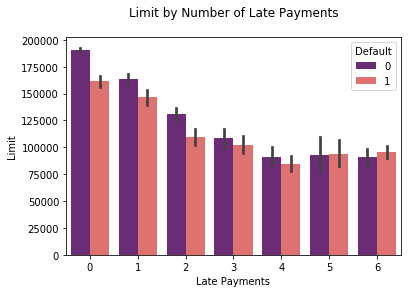

In [24]:
sns.barplot(x = 'Late_Pmt', y = 'Limit', hue = 'Default', palette = 'magma', data = cc)
plt.title('Limit by Number of Late Payments\n')
plt.xlabel("Late Payments")

# non-defaulters generally have higher limits, and the more late pmts you have, the lower your limit is
#(up to about 4 late pmts, at which point it pretty much flattens out)

Pay_0 is the most recent, meaning that during the last month (September) the due amount was paid and only the revolving credit was used. Pay_2 is a value for a period 2 months before Pay_0 (July). So, if Pay_0=0 and Pay_2==3, this means the bill was paid.

Text(13.268182291666676, 0.5, 'Count')

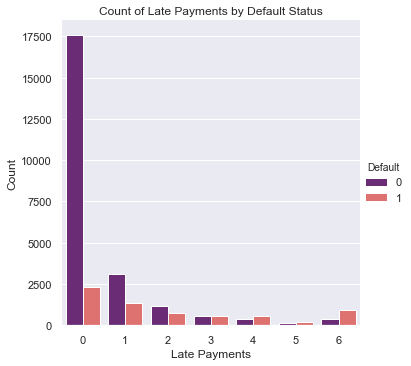

In [101]:
# 0 late pmts far outweigh multiple. 

sns.catplot(x='Late_Pmt', kind = 'count', hue = 'Default', palette='magma', data=cc)

plt.title("Count of Late Payments by Default Status")
plt.xlabel('Late Payments')
plt.ylabel('Count')

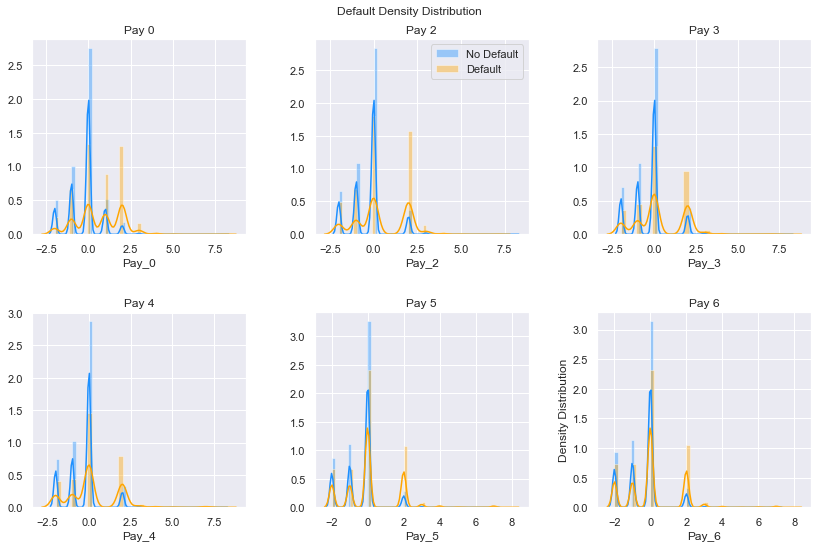

In [105]:
# Plot all the Distribution Densities
import seaborn as sns

f, axes= plt.subplots(2, 3, figsize = (12,8), facecolor='white') 
f.suptitle('Default Density Distribution')

ax1 = sns.distplot( cc.loc[cc.Default == 0, "Pay_0"] , 
                   color="dodgerblue", label="No Default", ax = axes[0,0])
ax1 = sns.distplot( cc.loc[cc.Default == 1, "Pay_0"] , 
                   color="orange", label="Default", ax = axes[0,0])

ax1.title.set_text('Pay 0')
plt.ylabel("Density Distribution")


ax2 = sns.distplot( cc.loc[cc.Default == 0, "Pay_2"] , 
                   color="dodgerblue", label="No Default", ax = axes[0,1])
ax2 = sns.distplot( cc.loc[cc.Default == 1, "Pay_2"] , 
                   color="orange", label="Default", ax = axes[0,1])

ax2.title.set_text('Pay 2')
plt.ylabel("Density Distribution")

ax3 = sns.distplot( cc.loc[cc.Default == 0, "Pay_3"] , 
                   color="dodgerblue", label="No Default", ax = axes[0,2])
ax3 = sns.distplot( cc.loc[cc.Default == 1, "Pay_3"] , 
                   color="orange", label="Default", ax = axes[0,2])

ax3.title.set_text('Pay 3')
plt.ylabel("Density Distribution")

ax4 = sns.distplot( cc.loc[cc.Default == 0, "Pay_4"] , 
                   color="dodgerblue", label="No Default", ax = axes[1,0])
ax4 = sns.distplot( cc.loc[cc.Default == 1, "Pay_4"] , 
                   color="orange", label="Default", ax = axes[1,0])

ax4.title.set_text('Pay 4')
# plt.ylabel("Density Distribution")

ax5 = sns.distplot( cc.loc[cc.Default == 0, "Pay_5"] , 
                   color="dodgerblue", label="No Default", ax = axes[1,1])
ax5 = sns.distplot( cc.loc[cc.Default == 1, "Pay_5"] , 
                   color="orange", label="No Default", ax = axes[1,1])

ax5.title.set_text('Pay 5')
plt.ylabel("Density Distribution")

ax6 = sns.distplot( cc.loc[cc.Default == 0, "Pay_6"] , 
                   color="dodgerblue", label="No Default", ax = axes[1,2])
ax6 = sns.distplot( cc.loc[cc.Default == 1, "Pay_6"] , 
                   color="orange", label="No Default", ax = axes[1,2])

ax6.title.set_text('Pay 6')

ax2.legend(['No Default', 'Default'],
           loc="best") 
plt.tight_layout(pad = 3.0)
plt.show()


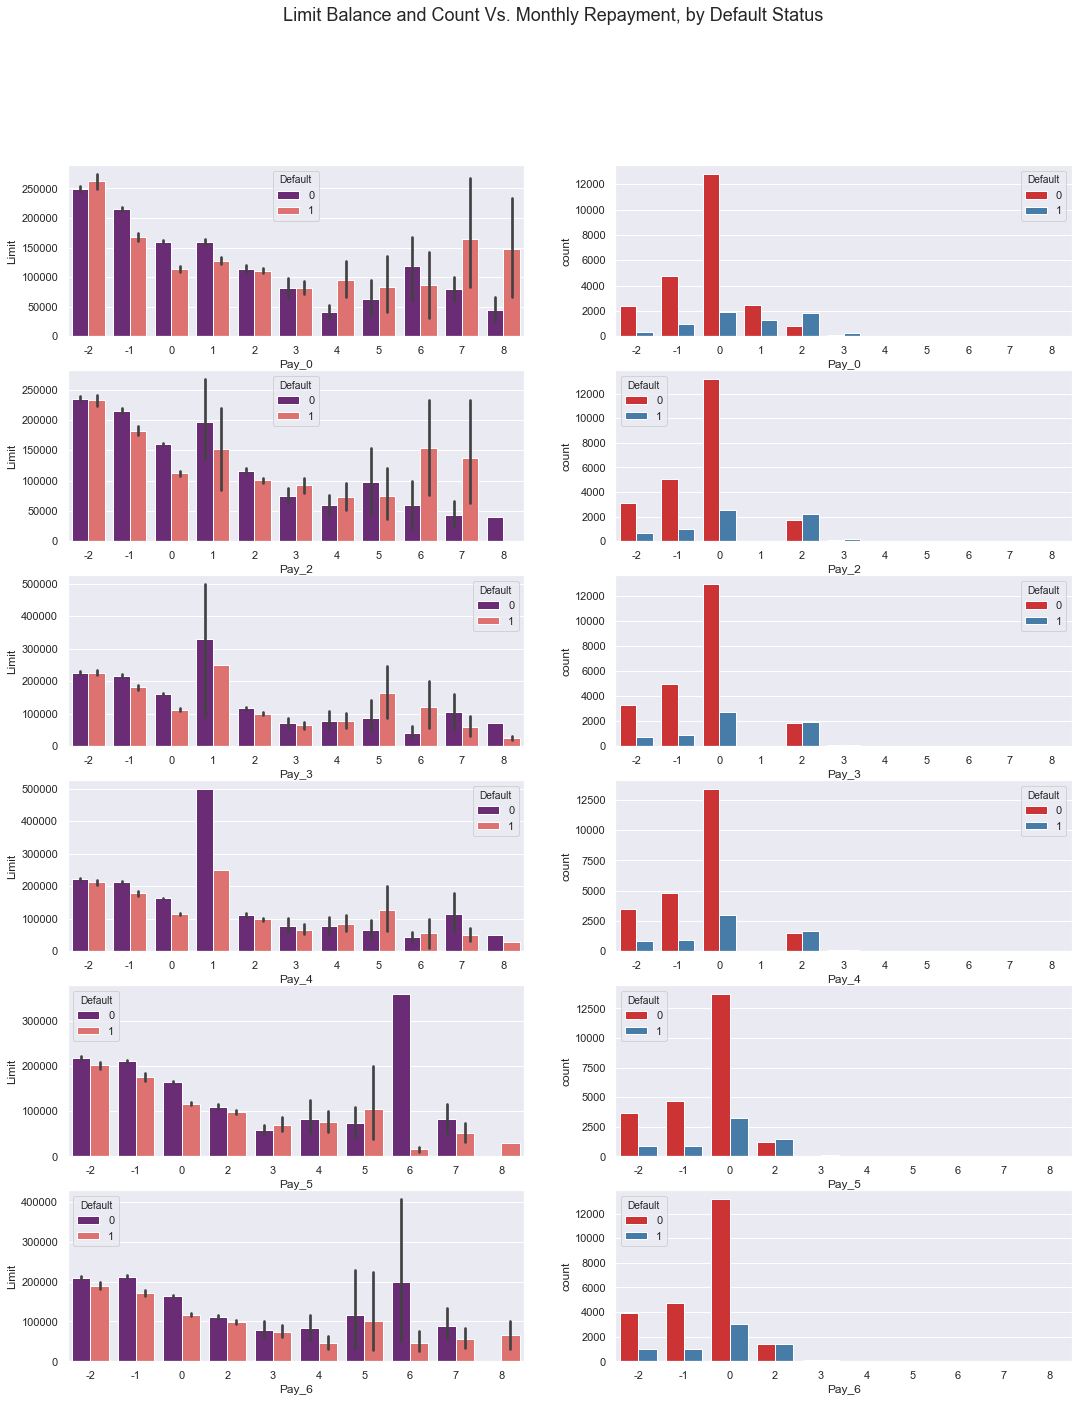

In [103]:
# Taking a look at the number of Defaults by the payment status each month. 

fig, axes= plt.subplots(6, 2, figsize = (18,22), facecolor='white') #figsize=(22,13),
fig.suptitle('Limit Balance and Count Vs. Monthly Repayment, by Default Status', size = 18)

#to give some examples of different palettes, here's this.
# deciding between magma and Set1 colour palette

ax1 = sns.barplot(x = 'Pay_0', y = 'Limit', hue='Default', palette='magma', data= cc, ax=axes[0,0])
ax2 = sns.countplot(x='Pay_0', hue='Default', palette='Set1', data= cc, ax=axes[0,1])

ax3 = sns.barplot(x='Pay_2', y = 'Limit', hue='Default', palette='magma', data= cc, ax=axes[1,0])
ax4 = sns.countplot(x='Pay_2', hue='Default', palette='Set1', data= cc, ax=axes[1,1])

ax5 = sns.barplot(x='Pay_3', y = 'Limit', hue='Default', palette='magma', data= cc, ax=axes[2,0])
ax6 = sns.countplot(x='Pay_3', hue='Default', palette='Set1', data= cc, ax=axes[2,1])

ax7 = sns.barplot(x='Pay_4', y = 'Limit', hue='Default', palette='magma', data= cc, ax=axes[3,0])
ax8 = sns.countplot(x='Pay_4', hue='Default', palette='Set1', data= cc, ax=axes[3,1])

ax9 = sns.barplot(x='Pay_5', y = 'Limit', hue='Default', palette='magma', data= cc, ax=axes[4,0])
ax10 = sns.countplot(x='Pay_5', hue='Default', palette='Set1', data= cc, ax=axes[4,1])

ax11 = sns.barplot(x='Pay_6', y = 'Limit', hue='Default', palette='magma', data= cc, ax=axes[5,0])
ax12 = sns.countplot(x='Pay_6', hue='Default', palette='Set1', data= cc, ax=axes[5,1])

# plt.tight_layout()

plt.show()

# Need: titles, maybe better sizing

In [106]:
#Predictive model - check for correlation 

val = cc.corr() #finds linear pearson correlation
val = val [val < 1] #to avoid correlating values with themselves (ie corr = 1)
val

,Limit,Gender,Education,Marriage,Age,Pay_0,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_amt1,...,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Late_Pmt,Default
Limit,NaN,0.024755,-0.253818,-0.098943,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.236763,-0.153520
Gender,0.024755,NaN,0.011489,-0.031099,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,...,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.043760,-0.039961
Education,-0.253818,0.011489,NaN,-0.176173,0.193171,0.130555,0.151928,0.144526,0.136978,0.122763,0.108929,0.004781,...,-0.003113,-0.014030,-0.017484,-0.014696,-0.045719,-0.039568,-0.056099,-0.044408,-0.051284,-0.052996,0.079595,0.053162
Marriage,-0.098943,-0.031099,-0.176173,NaN,-0.464833,0.015040,0.021747,0.029389,0.029053,0.033569,0.030761,-0.023695,...,-0.024083,-0.020830,-0.022614,-0.018996,-0.008396,-0.012581,-0.006056,-0.015049,-0.001779,-0.004726,-0.008749,-0.030555
Age,0.144713,-0.090874,0.193171,-0.464833,NaN,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,-0.015356,0.013890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pay_amt4,0.203242,-0.002229,-0.044408,-0.015049,0.021379,-0.064005,-0.046858,-0.046067,-0.043461,-0.058299,0.019018,0.158303,...,0.143405,0.130191,0.293118,0.250237,0.199558,0.180107,0.216325,NaN,0.151830,0.157834,-0.072270,-0.056827
Pay_amt5,0.217202,-0.001667,-0.051284,-0.001779,0.022850,-0.058190,-0.037093,-0.035863,-0.033590,-0.033337,-0.046434,0.167026,...,0.179712,0.160433,0.141574,0.307729,0.148459,0.180908,0.159214,0.151830,NaN,0.154896,-0.075979,-0.055124
Pay_amt6,0.219595,-0.002766,-0.052996,-0.004726,0.019478,-0.058673,-0.036500,-0.035861,-0.026565,-0.023027,-0.025299,0.179341,...,0.182326,0.177637,0.164184,0.115494,0.185735,0.157634,0.162740,0.157834,0.154896,NaN,-0.065917,-0.053183
Late_Pmt,-0.236763,-0.043760,0.079595,-0.008749,-0.015356,0.635398,0.661151,0.653741,0.634303,0.606932,0.564630,-0.026905,...,0.001566,0.020798,0.037398,0.042391,-0.086045,-0.068192,-0.076115,-0.072270,-0.075979,-0.065917,NaN,0.398394


Text(0.5, 1, 'Credit Default Correlation Heatmap\n')

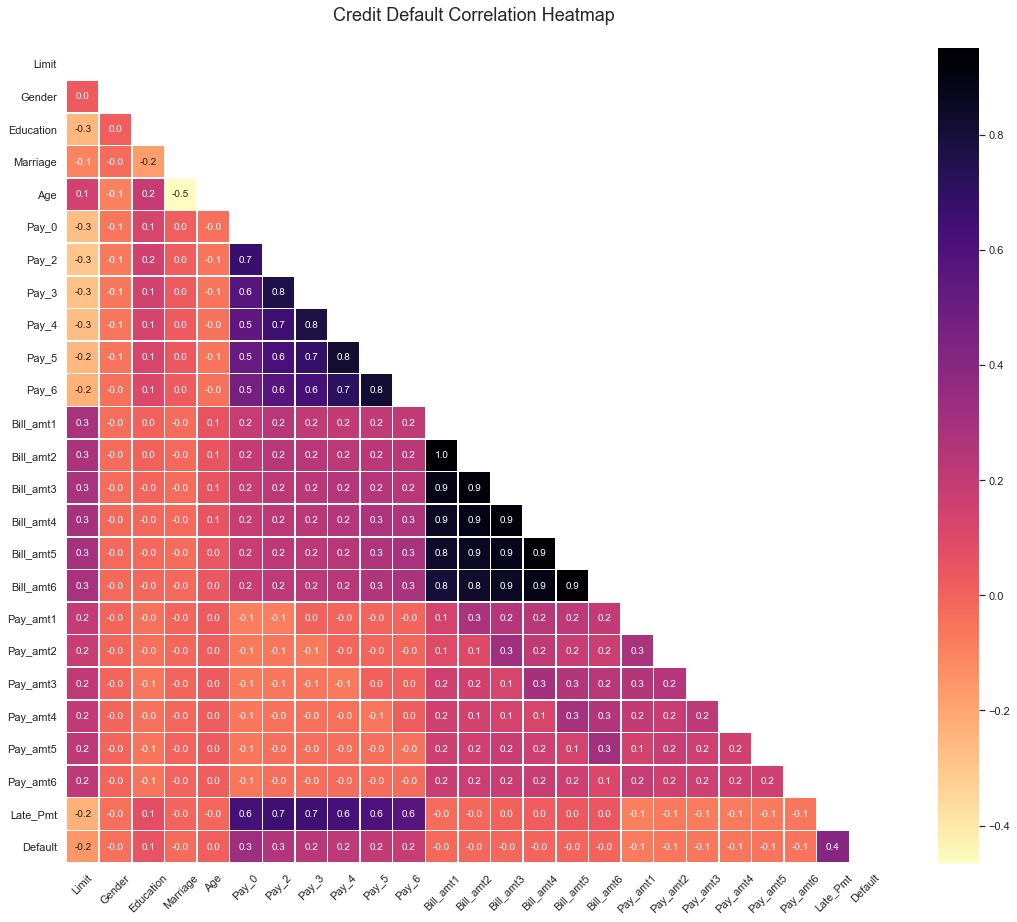

In [111]:
# Visualize

mask = np.full_like(val,0) #alternatively, can use np.zeros_like(result)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f,ax=plt.subplots(figsize=(20,15))
sns.heatmap(val, cbar=True, square=True, annot=True, fmt= '.1f', # keep 1 digit after the decimal for ease of viewing
           xticklabels=True, yticklabels=True,
           cmap='magma_r', linewidths=.5, mask=mask, ax=ax)
ax.set_xticklabels(    ax.get_xticklabels(),
                   rotation = 45) # make it legible
plt.title("Credit Default Correlation Heatmap\n", size = 18)

# Machine Learning - Unsupervised

In [162]:
# first up: drop all those nasty nan's we made earlier
cc.dropna(inplace=True)

In [163]:
#isolate Independent Var, X (pay_0:pay_6) and Dependent Var, Y (Default) using pandas manipulation.
import sklearn
from sklearn.model_selection import train_test_split

X = cc.drop('Default', axis=1)
y = cc['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=33, stratify = y)
# split this ish. Using stratify = y to use the right proportion of default/no default in my train and test,
# IE, my y var has 22% in the positive category (1, default) and 78% in the 0 category (no default). One way to somewhat 
# offset the extreme imbalance of this dataset.

# PCA : Principal Components Analysis

We don't want to keep predicting the same thing over and over. For example, because Bill_amt1 and Bill_amt2 are perfectly correlated, if we predict both in our model, we are giving that variance extra, unwarranted, weight in our model. Therefore, we'll do a PCA to make a few variables that contain the unique variability in our data by making a mash of our variables. 

While PCA makes it a bit more difficult to see how each of our variables contribute to our predictions, we can see the relative weighting of our initial variables. The advantage is that we get a more robust model, that should make for better future predictions and less overfitting of our current data, as it will be less susceptible to noise.

Variance is the differences between the scores in a set of data. PCA reduces the dimensionality of a our dataset while retaining as much of the original variance present in our collection of variables. The dataset consists of many variables correlated with each other, either heavily or lightly, so PCA identifies the hyperplane that lies closest to the data, and then projects the data onto it. In so doing, we can reduce the number of features we're working with while also retaining as much variance as possible. 

The same is done by transforming the variables to a new set of variables, aka Principal Components. These are orthogonal and ordered such that the retention of variation present in the original variables decreases as we move down in the order. So, in this way, the 1st principal component retains maximum variation that was present in the original components. 

In [171]:
from sklearn.decomposition import PCA

pca	= PCA(n_components = 8) # the number of components we choose is somewhat of a judgement call - we could have cut after
#  the first five components with only a 2.3% reduction in our model's explanation of our current data
pca	= pca.fit_transform(X)

pca.explained_variance_ratio_
sum_of_pca_variance = (pca.explained_variance_ratio_.sum()) *100
print("The  reduced features account for the following % variability in Credit Card dataset:\n "
      , pca.explained_variance_ratio_)

print("\nTotal variability retained with PCA reduced to 8 features: {:.2f}%".format(sum_of_pca_variance))

The  reduced features account for the following % variability in Credit Card dataset:
  [0.61092726 0.2949845  0.03044072 0.01694933 0.00941282 0.00902778
 0.00752355 0.00638495]

Total variability retained with PCA reduced to 8 features: 98.57%


In [172]:
import numpy as np
from sklearn.decomposition import PCA

pca	= PCA() 
pca.fit(X) 
cumsum = np.cumsum(pca.explained_variance_ratio_) 
d = np.argmax(cumsum >= 0.98) + 1
print("Number of features required to retain 98% of the dataset's variability: ", d)
# compute PCA without reducing dimensionality, then computes minumum number of dimensions required
# to preserve 98% of the training set's variance
# 2 features account for greater than 90% of the training dataset's variabiltiy

Number of features required to retain 98% of the dataset's variability:  8


Text(0.5, 1.0, '\nExplained Variance by # of Dimensions using PCA\n')

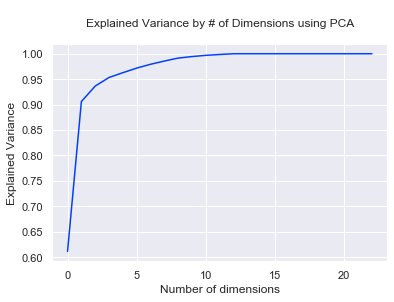

In [173]:
# Lift chart of explained variance

# scale it

from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

plt.plot(cumsum)
plt.xlabel("Number of dimensions")
plt.ylabel("Explained Variance")
plt.title("\nExplained Variance by # of Dimensions using PCA\n")
# The first two dimensions give the greatest lift, while pretty much all of the variability is explained by the
#  time 10 dimensions rolls around, which would fit all of the variability (useful and random) in our current data

In [175]:
from sklearn.decomposition import PCA # keep the first eight principal components of the data 

pca = PCA(n_components=8) # fit PCA model to credit card
pca.fit(X_scaled)# transform data onto the first eight principal components 

X_pca = pca.transform(X_scaled) 
print("Original shape of Credit Card dataset: {}".format(str(X_scaled.shape))) 
print("Reduced shape of Credit Card dataset: {}".format(str(X_pca.shape)))

# reduced training dataset down to 8 features

Original shape of Credit Card dataset: (29877, 23)
Reduced shape of Credit Card dataset: (29877, 8)


Text(0, 0.5, 'Second principal component')

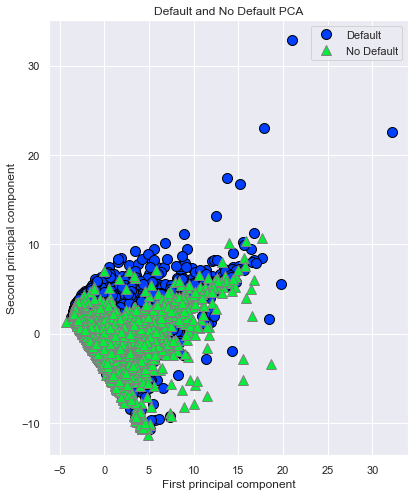

In [177]:
import numpy as np

import mglearn

# plot the first 2 principal components

# plot first vs. second principal component, colored by class 
plt.figure(figsize=(10, 8)) 
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y) 
plt.legend(["Default", "No Default"],
           loc="best") 
plt.gca().set_aspect("equal") 
plt.title("Default and No Default PCA")
plt.xlabel("First principal component") 
plt.ylabel("Second principal component")

# Machine Learning - Supervised

# Decision Tree : Baseline

 - Decision Trees (DTs) are a supervised learning method used for classification and regression, we have a binary classification problem (y-var: Default = 1, No Default = 0).
- DTs learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model. 
- DT's are prone to overfitting, however. With a deep tree, we risk overfitting our model, meaning that the algorithm learns too well from the training dataset and has a hard time generalizing to unseen data.

# Set up Pipeline for Decision Tree

Pipeline: a handy pre-processing method that helps automate the machine learning workflow. I've chosen to scale, run PCA, cross-validate and search the best parameters in one step, in addition to testing and evaluating the cross-validated model. 

Decision Tree Best parameters (CV score = 79.77%)
{'m__ccp_alpha': 0, 'm__class_weight': None, 'm__criterion': 'entropy', 'm__max_depth': 2, 'pca__n_components': 2}


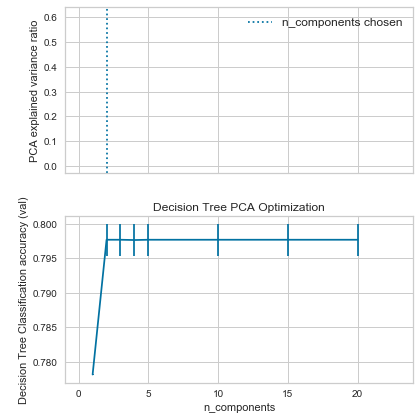

In [222]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from random import randint

#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model3 = DecisionTreeClassifier()

pipe_tree = Pipeline(steps=[('s', scaler), ('pca', pca), ('m', model3)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify = y)

# set parameters of pipelines using ‘__’ separated parameter names:
from sklearn.utils.fixes import loguniform

param_grid = {"pca__n_components": [1,2,3,4,5, 10, 15, 20],
              'm__ccp_alpha' : [0, 0.1, 0.2, 0.3, 1], # As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves. 
              "m__max_depth": [2, 10], # I set a limit of 10 for max depth, otherwise all models would select None and that's
              # a recipe for overfitting. maximum amount of steps the tree should do
              "m__criterion": ["gini", "entropy"], #gini (measures how often a randomly chosen element would be incorrectly identified) 
              # entropy (measures the information contained by each attribute, thus we estimate the reduction in entropy due to sorting on the attribute)
              "m__class_weight" : ['balanced', None]} 

search = GridSearchCV(pipe_tree, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_tree = search.fit(X_train, y_train)
#Get Best Parameters
best_param_score = search.best_score_ * 100
print("Decision Tree Best parameters (CV score = {:.2f}%)".format(best_param_score))
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

#plot

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
plt.title("Decision Tree PCA Optimization")
ax0.plot(np.arange(1, pca.n_components_ + 1),pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('\nDecision Tree Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 24)

plt.tight_layout()
plt.show()
# wow, way fewer PCA components than other models.

In [223]:
#----------Testing Best Parameters---------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time

t0 = time()
clf_tree = clf_tree.best_estimator_
y_pred_tree = clf_tree.predict(X_test)
print("done in %0.3fs" % (time() - t0))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
scores_cv_tree = cross_val_score(clf_tree, X_train, y_train, cv=cv)

scores_tree = cross_val_score(clf_tree, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)

done in 0.015s


-------------- | Decision Tree Performance Summary |--------------

Decision Tree Accuracy: 80.51%
CV Mean: 79.74% (STD: 0.54%)


Decision Tree Confusion Matrix:

[[4437  213]
 [ 952  374]]

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4650
           1       0.64      0.28      0.39      1326

    accuracy                           0.81      5976
   macro avg       0.73      0.62      0.64      5976
weighted avg       0.78      0.81      0.77      5976

Mean ROC AUC: 67.05%
Misclassified examples: 1165
Misclassification Rate: 19.49%
Training Set Accuracy: 80.07%
Test Set Accuracy: 80.51%

------ Decision Tree Classifier -- Parameters specified: classifier.fit [Done]


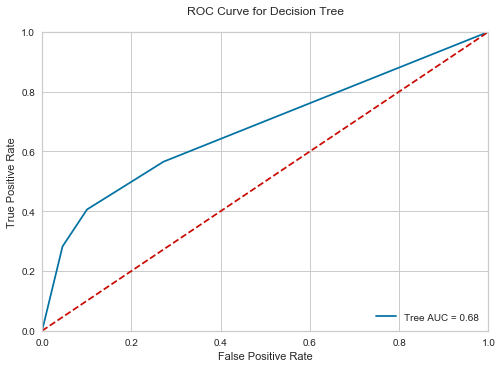

In [225]:
#--------| Decision Tree Classification report | --------

print ("-------------- | Decision Tree Performance Summary |--------------\n")
tree_accuracy = (accuracy_score(y_pred_tree, y_test)) *100

print("Decision Tree Accuracy: {:.2f}%".format(tree_accuracy)) 
print("CV Mean: {:.2f}% (STD: {:.2f}%)".format(scores_cv_tree.mean()*100,
                                          scores_cv_tree.std()*100),
                                          end="\n\n" )
tree_cm = confusion_matrix(y_test, y_pred_tree)
tree_misclass = (y_test != y_pred_tree).sum()
tree_error_rate = ((y_test != y_pred_tree).sum()/len(y_pred_tree))*100
tree_mean_roc_auc = (scores_tree.mean())*100
tree_train_accuracy = (clf_tree.score(X_train, y_train))*100
tree_test_accuracy = (clf_tree.score(X_test, y_test))*100

print("\nDecision Tree Confusion Matrix:\n")
print(tree_cm)
print("\nDecision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_tree))
print('Mean ROC AUC: {:.2f}%'.format(tree_mean_roc_auc))
print('Misclassified examples: {:d}'.format(tree_misclass))
print('Misclassification Rate: {:.2f}%'.format(tree_error_rate))
print("Training Set Accuracy: {:.2f}%".format(tree_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(tree_test_accuracy))
print('\n------ Decision Tree Classifier -- Parameters specified: classifier.fit [Done]')

# ROC the houseeeeeeeeeeeeeeeeee
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_tree.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve for Decision Tree\n')
plt.plot(fpr, tpr, 'b', label = 'Tree AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- ## Decision Tree F1 score for Defaults (1): 39% 

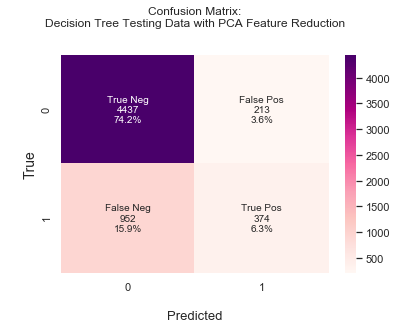

In [202]:
#Pretty Confusion Matrix for Decision Tree Testing Data

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               tree_cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    tree_cm.flatten()/np.sum(tree_cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(tree_cm, annot=labels, fmt='', cmap='RdPu')

plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\nDecision Tree Testing Data with PCA Feature Reduction\n\n")
plt.show()

### Recall (aka sensitivity): our model's ability to find all the relevant cases within a dataset (or, the proportion of the total amount of relevant instances that were actually retrieved).
- The number of true positives divided by the number of true positives plus the number of false negatives. 
 - True positives are data point classified as positive by the model that actually are positive (are correct)
 - False negatives are data points the model identifies as negative that actually are positive (incorrect).

### Precision (aka positive predictive val): our model's ability to identify only the relevant data points (or, the proportion of relevant instances among the retrieved instances).
 - the number of true positives divided by the number of true positives plus the number of false positives. 
 - False positives are cases the model incorrectly labels as positive that are actually negative. In this example, individuals the model classifies as defaulting that are not defaulting.
 - when we increase the recall, we decrease the precision
 
While recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant.

F1: a weighted average of precision and recall. 

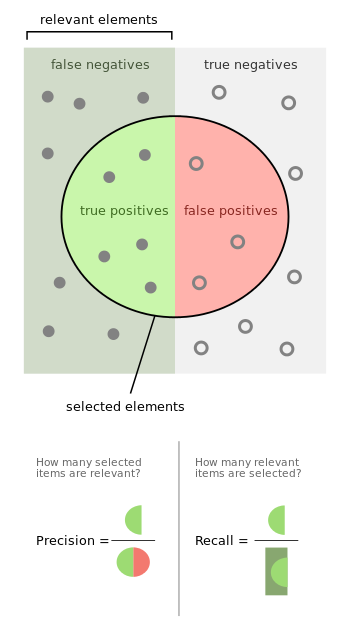

We chose to use F1 of the positive class (Default, 1) as our evaluation metric for this particular dataset. We have done so because F1 is the harmonic mean of precision and recall, so it is a useful metric for our particular dataset. F1 score is a better indicator of classification models than accuracy when there is a bias in target classes. We care more about correctly being able to predict who will default on their credit card, so we want to limit the number of false negatives and false positives. As we have seen with Decision Tree, the baseline F1 score for the Defaults is 0.39.

In [236]:
# Tree visualization
from sklearn import tree
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

from IPython.display import Image
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeClassifier
tree_model = tree.DecisionTreeClassifier(ccp_alpha = 0, class_weight = 'balanced',
                                         criterion= 'entropy', max_depth = 5,  
                                         max_features = 6, max_leaf_nodes = 6
                                        )

tree_model.fit(X_train_std_transformed, y_train)

dot_data = export_graphviz(tree_model,
                          filled=True,
                          rounded=True,
                          class_names=['Default',
                                      'No Default'],
                          feature_names = ['Limit',  'Gender', 'Education', 'Marriage',
 'Age', 'Pay_0', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Bill_amt1', 'Bill_amt2',
 'Bill_amt3',  'Bill_amt4',  'Bill_amt5',  'Bill_amt6',  'Pay_amt1',  'Pay_amt2',
 'Pay_amt3',  'Pay_amt4',  'Pay_amt5', 'Pay_amt6'],
                        out_file=None)
                                          
# graph.title("Diagnosis Decision tree")
graph =  graph_from_dot_data(dot_data)
# graph
graph.write_png('credit_card_tree.png') #see home page for credit_card_tree, but I've pasted below for ease of viewing.
print('Credit Card Decision Tree')

Credit Card Decision Tree


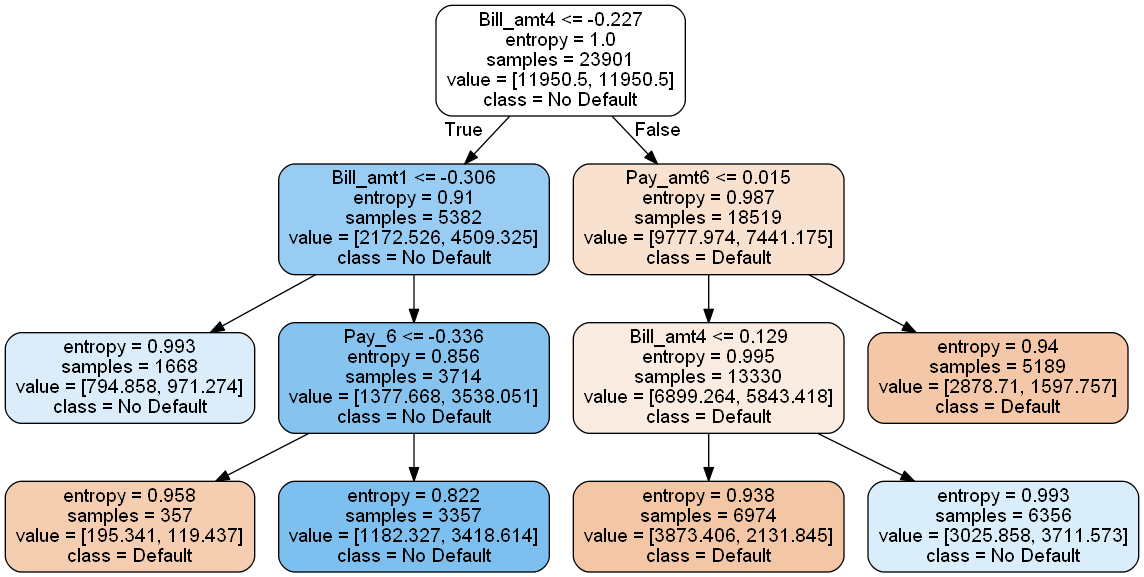

# XG Boost Classifier
XGBoost, or Extreme Gradient Boost, is a decision-tree-based ensemble algorithm using gradient boosted decision trees designed for speed and performance. The name refers to the engineering goal to push the limit of computations resources for boosted tree algorithms, by taking a bunch of weak learners (trees) are added to correct the errors made by existing models. Using gradient descent to minimize loss with each subsequent model, models are added sequentially until no further improvements can be made.

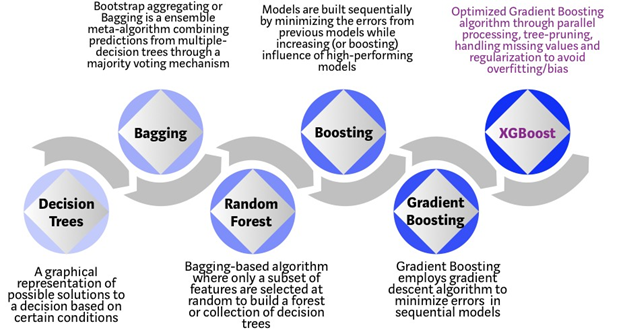

# Feature Importance using XG Boost

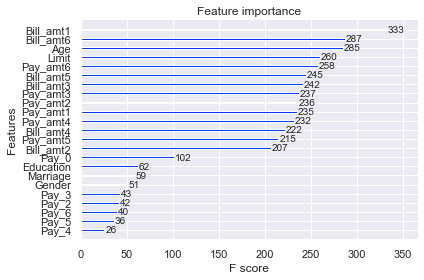

In [164]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
sns.despine()
fig_size = (15,15)
plt.tight_layout()
plt.show()
# interesting, Bill_Amt 1, then Pay_amt6 are most important. Late_Pmt is in the lower half.
# showing the default parameters for XG B

# Set up Pipeline for XG Boost

Best parameters (CV score = 81.42%)
Best parameters:
{'pca__n_components': 15, 'm__subsample': 0.9, 'm__silent': 0, 'm__reg_lambda': 5.0, 'm__min_child_weight': 3.0, 'm__max_depth': 15, 'm__gamma': 0.5, 'm__eta': 0.01, 'm__colsample_bytree': 0.9, 'm__colsample_bylevel': 0.4, 'm__booster': 'gbtree'}




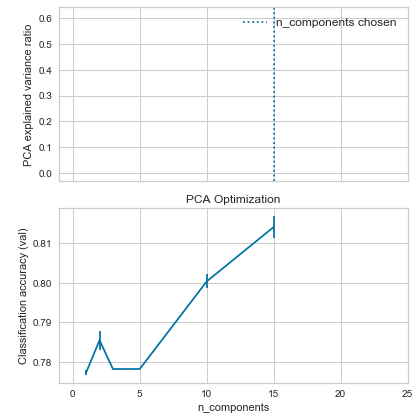

In [270]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model1 = XGBClassifier()

pipe_xg = Pipeline(steps=[('s', scaler), ('pca', pca), ('m', model1)]) # set up the pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify = y)
# setting the stratify parameter makes a split so that the proportion of values in the sample
# produced will be the same as the proportion of values provided, ie correct proportion of Default to No Default

# set parameters of pipelines using ‘__’ separated parameter names:

param_grid = {"pca__n_components":[1,2,3,4,5, 10, 15, 20, 25],
              'm__silent': [0],
              'm__max_depth': [6, 10, 15, 20],
              'm__eta': [0.001, 0.01, 0.1, 0.2, 0,3], #learning rate
              'm__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'm__colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'm__colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              'm__min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
              'm__gamma': [0, 0.25, 0.5, 1.0],
              'm__reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0], #L2 default is 1, akin to Ridge regression
              'm__booster':['gbtree']
              }

search = RandomizedSearchCV(pipe_xg, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_xg = search.fit(X_train, y_train)
#Get Best Parameters
best_param_score = search.best_score_ *100
print("Best parameters (CV score = {:.2f}%)".format(best_param_score))
print("Best parameters:")
print(search.best_params_)
print('\n')

# Plot the PCA spectrum
pca.fit(X_train)

#plot

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
plt.title("PCA Optimization")
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('\nClassification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 25)

plt.tight_layout()
plt.show()

# The pipeline selected 15 PC's and the following parameters:

In [271]:
# cross-validation and error measuring
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'eta': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10, as_pandas=True, seed=123)

In [272]:
cv_results.head() # we can see that each iteration improves the model a little bit.

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.198715,0.001010,0.202597,0.000899
1,0.192221,0.001648,0.195736,0.002012
2,0.190514,0.001810,0.193727,0.002252
3,0.187820,0.003547,0.191017,0.001586
4,0.187753,0.001702,0.191184,0.002079


In [273]:
# cross-validation mean
print("Cross-Validation Results for error mean on test data:")
print((cv_results["test-error-mean"]).tail(1))

Cross-Validation Results for error mean on test data:
7    0.189544
Name: test-error-mean, dtype: float64


In [274]:
# AUC results with Cross-Validation

cv_results_auc = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10, metrics = 'auc', as_pandas=True, seed=123)

cv_results_auc.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.701752,0.001958,0.693769,0.006093
1,0.755493,0.003290,0.748162,0.008719
2,0.765242,0.003067,0.758576,0.007816
3,0.767955,0.002072,0.762220,0.005277
4,0.770989,0.001361,0.764831,0.005442


In [275]:
#----------Testing Best Parameters---------

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time

t0 = time()
clf_xg =clf_xg.best_estimator_
y_pred_xg = clf_xg.predict(X_test)
print("[----------] Done in %0.3fs" % (time() - t0))

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
scores_cv_xg = cross_val_score(clf_xg, X_train, y_train, cv=cv)

scores = cross_val_score(clf_xg, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)

[----------] Done in 0.123s


------------------------- | XGBoost Performance Summary | ---------------------------
Accuracy: 81.59%
CV Mean: 0.815 (std: 0.01)


XG Boost Confusion Matrix:

[[4417  233]
 [ 867  459]]

XG Boost Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4650
           1       0.66      0.35      0.45      1326

    accuracy                           0.82      5976
   macro avg       0.75      0.65      0.67      5976
weighted avg       0.80      0.82      0.79      5976

Mean ROC AUC: 75.30%
Misclassified examples: 1100
Count of prediction dataset:  5976
Misclassification Rate: 18.41%
Training Set Accuracy: 85.800%
Test Set Accuracy: 81.59%

------------------ XGBoostClassifier -- Parameters specified -- : classifier.fit [Done]



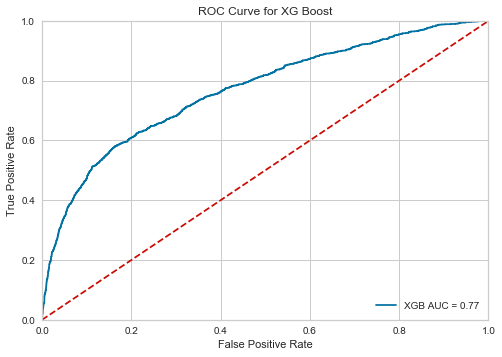

In [276]:
#---------XGBoost Classification report--------

print ("------------------------- | XGBoost Performance Summary | ---------------------------")
xgb_accuracy = (accuracy_score(y_pred_xg, y_test)) *100
print("Accuracy: {:.2f}%".format(xgb_accuracy))
print("CV Mean: {:.3f} (std: {:.2f})".format(scores_cv_xg.mean(),
                                          scores_cv_xg.std()),
                                          end="\n\n" )
xgb_cm = confusion_matrix(y_test, y_pred_xg)
xg_misclass = (y_test != y_pred_xg).sum()
xg_error_rate = ((y_test != y_pred_xg).sum()/len(y_pred_xg))*100
mean_roc_auc = (scores.mean())*100
xg_train_accuracy = (clf_xg.score(X_train, y_train))*100
xg_test_accuracy = (clf_xg.score(X_test, y_test))*100

print("\nXG Boost Confusion Matrix:\n")
print(xgb_cm)
print("\nXG Boost Classification Report:\n")
print(classification_report(y_test, y_pred_xg))
print('Mean ROC AUC: {:.2f}%'.format(mean_roc_auc))
print('Misclassified examples: {:d}'.format(xg_misclass))
print('Count of prediction dataset: ', len(y_pred_xg))
print('Misclassification Rate: {:.2f}%'.format(xg_error_rate))
print("Training Set Accuracy: {:.3f}%".format(xg_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(xg_test_accuracy))
print('\n------------------ XGBoostClassifier -- Parameters specified -- : classifier.fit [Done]\n')

# ROC the houseeeeeeeeeeeeeeeeee
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_xg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve for XG Boost')
plt.plot(fpr, tpr, 'b', label = 'XGB AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- ## XGBoost F1 score for Defaults (1): 45%.

This is a big improvement over Decision Tree, an increase of 6%. XGB had fewer False Negatives than Decision Tree. 

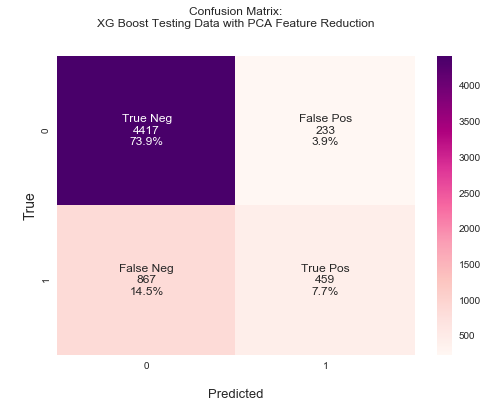

In [277]:
#Confuse dat matrix for XG Boost. I want to see it both as percentages and as absolute numbers.

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               xgb_cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    xgb_cm.flatten()/np.sum(xgb_cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(xgb_cm, annot=labels, fmt='', cmap='RdPu')
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\nXG Boost Testing Data with PCA Feature Reduction\n\n")
plt.show()

# Logistic Regression  
Logistic regression is used to guess the probability of an event occurring with binary data, where either the event happens (1) or the event does not happen (0). In this case, 1 is 'Default', 0 is 'No Default'. What we're really interested in is predicting the probability for the outcome variable to have a value of 1. While linear regresion uses the "least squares" approach, binary logistic regression uses a complex procedure known as maximum likelihood (ML) estimate.

Logistic regression is not able to handle a large number of categorical features/variables, and is vulnerable to overfitting. This model will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

In [190]:
model2.get_params().keys() # what are my params to work with all up in heah

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

Logistic Regression Best parameters (CV score = 80.01%)
{'pca__n_components': 20, 'm__solver': 'sag', 'm__random_state': 100, 'm__penalty': 'l2', 'm__max_iter': 100, 'm__class_weight': None, 'm__C': 0.001}


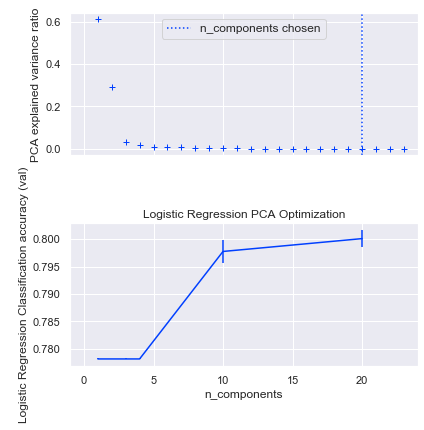

In [188]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model2 = LogisticRegression()

pipe_log = Pipeline(steps=[('s', scaler), ('pca', pca), ('m', model2)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify = y)

# set parameters of pipelines using ‘__’ separated parameter names:
from sklearn.utils.fixes import loguniform

param_grid = {"pca__n_components":[1,2,3,4,5, 10, 15, 20],
              'm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'm__penalty' : ['l1', 'l2', 'elasticnet'],
              'm__class_weight' : ['balanced', None],
              'm__random_state': [0, 50, 100],
              'm__max_iter': [0,100,1000, 10000],
              'm__solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}          

search = RandomizedSearchCV(pipe_log, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_log = search.fit(X_train, y_train)
#Get Best Parameters
best_param_score = search.best_score_ * 100
print("Logistic Regression Best parameters (CV score = {:.2f}%)".format(best_param_score))
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

#plot

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
plt.title("Logistic Regression PCA Optimization")
ax0.plot(np.arange(1, pca.n_components_ + 1),pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('\nLogistic Regression Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 24)

plt.tight_layout()
plt.show()

# n_components = 10, similar accuracy to XGB 

In [189]:
# Testing the best parameters
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time

t0 = time()
clf_log = clf_log.best_estimator_
y_pred_log = clf_log.predict(X_test)
print("[------] Done in %0.3fs" % (time() - t0))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
scores_cv_log = cross_val_score(clf_log, X_train, y_train, cv=cv)

scores_log = cross_val_score(clf_log, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)

[------] Done in 0.015s


-------------- | Logistic Regresssion Performance Summary |--------------

Logistic Regression Accuracy: 80.37%
CV Mean: 80.01% (STD: 0.45%)


Logistic Regression Confusion Matrix:

[[4565   85]
 [1088  238]]

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4650
           1       0.74      0.18      0.29      1326

    accuracy                           0.80      5976
   macro avg       0.77      0.58      0.59      5976
weighted avg       0.79      0.80      0.75      5976

Mean ROC AUC: 70.74%
Misclassified examples: 1173
Misclassification Rate: 19.63%
Training Set Accuracy: 80.10%
Test Set Accuracy: 80.37%
--------------- Logistic Regression -- Parameters specified-- : classifier.fit [Done]


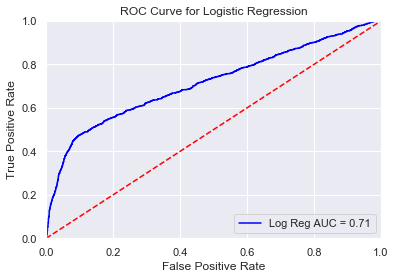

In [193]:
#--------| Logistic Regression Classification report | --------

print ("-------------- | Logistic Regresssion Performance Summary |--------------\n")
log_accuracy = (accuracy_score(y_pred_log, y_test)) *100

print("Logistic Regression Accuracy: {:.2f}%".format(log_accuracy)) 
print("CV Mean: {:.2f}% (STD: {:.2f}%)".format(scores_cv_log.mean()*100,
                                          scores_cv_log.std()*100),
                                          end="\n\n" )
log_cm = confusion_matrix(y_test, y_pred_log)
log_misclass = (y_test != y_pred_log).sum()
log_error_rate = ((y_test != y_pred_log).sum()/len(y_pred_log))*100
log_mean_roc_auc = (scores_log.mean())*100
log_train_accuracy = (clf_log.score(X_train, y_train))*100
log_test_accuracy = (clf_log.score(X_test, y_test))*100

print("\nLogistic Regression Confusion Matrix:\n")
print(log_cm)
print("\nLogistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_log))
print('Mean ROC AUC: {:.2f}%'.format(log_mean_roc_auc))
print('Misclassified examples: {:d}'.format(log_misclass))
print('Misclassification Rate: {:.2f}%'.format(log_error_rate))
print("Training Set Accuracy: {:.2f}%".format(log_train_accuracy))
print("Test Set Accuracy: {:.2f}%".format(log_test_accuracy))
print('--------------- Logistic Regression -- Parameters specified-- : classifier.fit [Done]')


# ROC the houseeeeeeeeeeeeeeeeee
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_log.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'Log Reg AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# unbalanced dataset yiels a lopsided false negative rate!
# yikes that recall is terrible for 1, but the precision is not bad.
# Recall is

- Recall refers to the percentage of total relevant results correctly classified by the algorithm.
- IE, how many of the true positives were recalled (found)
- Precision is how many of the returned hits were true positive i.e. how many were correct hits.
-## Logistic Regression F1 score for Defaults (1): 29%
In terms of F1 score, Logistic Regression had the poorest outcome of all 3 models.

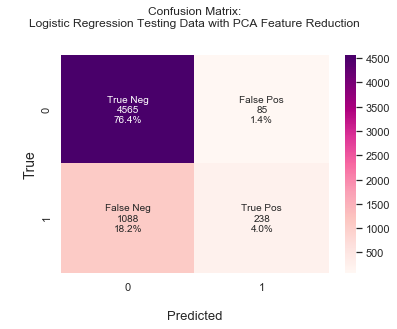

In [198]:
#Pretty Confusion Matrix for Logistic Regression Testing Data

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               log_cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    log_cm.flatten()/np.sum(log_cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(log_cm, annot=labels, fmt='', cmap='RdPu')

plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\nLogistic Regression Testing Data with PCA Feature Reduction\n\n")
plt.show()

## Learning Curves

--------------- | Decision Tree Classifier | -- Learning Curve -- : [Done]


C:\Users\eklas\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


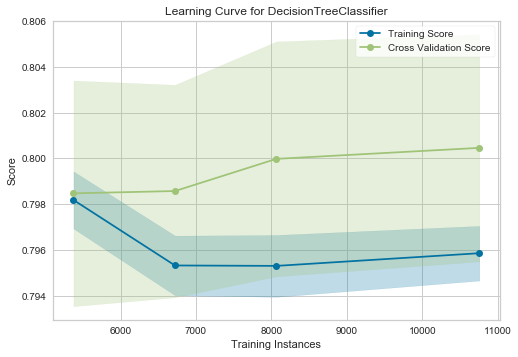

In [206]:
## Learning Curve : Decision Tree
print('--------------- | Decision Tree Classifier | -- Learning Curve -- : [Done]')
import sklearn.metrics
from yellowbrick.model_selection import LearningCurve
sizes = [0.2, 0.25, 0.3, 0.4] # checking out different sizes for training. 
# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    clf_tree, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4 # I want f1_weighted becasue f1
    # is the weighted avg of precision and recall. 
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

# converged < 6000 training size. There's a huge gap between training and CV score

--------------- | XBBoost Classifier | -- Learning Curve -- : [Done]


C:\Users\eklas\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


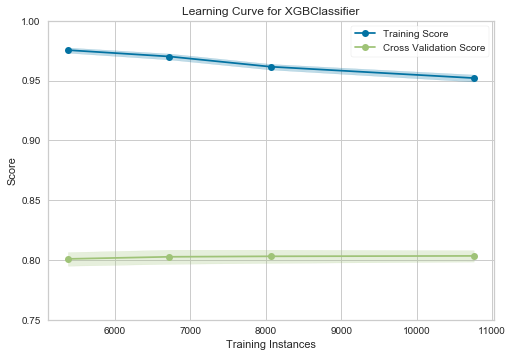

In [205]:
## Learning Curve : XG Boost ##
print('--------------- | XBBoost Classifier | -- Learning Curve -- : [Done]')
import sklearn.metrics
from yellowbrick.model_selection import LearningCurve
sizes = [0.2, 0.25, 0.3, 0.4]
# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    clf_xg, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4 # I want f1_weighted becasue f1
    # is the weighted avg of precision and recall. 
)

visualizer.fit(X, y)        # Fit the data to the visualizer
plt.ylim(0.75, 1.0)
visualizer.show()           # Show this mother

# big gap between training and CV score, this model may be underfitting.
# The CV score is also not improving, meaning it's not really learning. 
# This is surprising given the enormous size of the dataset. 

--------------- | Logistic Regression | -- Learning Curve -- : [Done]


C:\Users\eklas\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


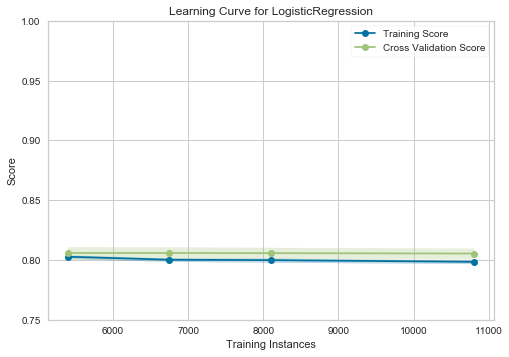

In [42]:
## Learning Curve : Logistic Regression ##
print('--------------- | Logistic Regression | -- Learning Curve -- : [Done]')
import sklearn.metrics
from yellowbrick.model_selection import LearningCurve
sizes = [0.2, 0.25, 0.3, 0.4]
# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    clf_log, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4 # I want f1_weighted becasue f1
    # is the weighted avg of precision and recall. 
)

visualizer.fit(X, y)        # Fit the data to the visualizer
plt.ylim(0.75, 1.0)
visualizer.show()           # Show this mother
# This has a good-sized gap, model is learning smoothly and doesn't show signs of overfitting

# ROC Curve

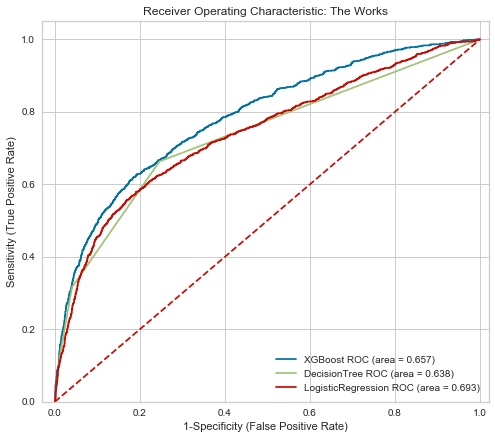

In [282]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import DecisionTree
from sklearn.neural_network import MLPClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

sc = StandardScaler()
X_train_pca = sc.fit_transform(X_train)
X_test_pca = sc.transform(X_test)

pca = PCA(n_components=15)
# X_pca = pca.transform(X_scaled)
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

X_train_pca, X_test_pca, y_train_pca, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

plt.figure()

# Add the models to the list that I want to view on the ROC plot

models = [
{
    'label': 'XGBoost',
    'model': XGBClassifier(subsample = 0.9, silent  = 0, reg_lambda =5.0,
                           n_estimators = 100, min_child_weight =3.0,
                           max_depth= 15, gamma = 0.5, eta = 0.01,
                           colsample_bytree  = 0.9, colsample_bylevel =0.4, 
                           booster = 'gbtree')
},
{
    'label': 'DecisionTree',
    'model': DecisionTreeClassifier(ccp_alpha = 0, criterion = 'entropy',
                                    max_depth = 2)
}, 
{
    'label': 'LogisticRegression',
    'model': LogisticRegression(solver = 'liblinear',
                                penalty = 'l2', C = 1, max_iter = 1000, class_weight = 'balanced')        
}]

# Below for loop iterates through my models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_pca, y_train_pca) # train the model
    y_pred_pca = model.predict(X_test_pca) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_pca)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test, model.predict(X_test_pca))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.03, 1.02])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic: The Works')
plt.legend(loc="lower right")
fig = plt.gcf()
# fig.savefig('ROC_combos.png', dpi=100)
fig.set_size_inches(8, 7, forward=True)
plt.show()

# ROC Curve

Receiver Operating Characteristic curve (or ROC curve) plots:
 - the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.  
 - shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
 - The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
 - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
 - The area under the curve measures the test accuracy.

Performance Rank by ROC Curve:
 - Logistic Regression
 - XGboost
 - Decision Tree Classification
 
Performance Rank by F1 Score:
 - XGBoost
 - Decision Tree
 - Logistic Regression

# For Kicks: Deep Learning

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# make a function 
def deep_nn():
	# create model
	model = Sequential()
    # Fully connected layers are defined using the Dense class.
    # We can specify the number of neurons or nodes in the layer as the first argument, 
    # and specify the activation function using the activation argument.
    # rectified linear unit activation function 'ReLU' on the first two layers and the Sigmoid function 
    # in the output layer. Sigmoid works for binary problems
	model.add(Dense(60, input_dim=24, activation='relu')) #input_dim is the number of features
	model.add(Dense(30, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #Using cross entropy as the loss argument. 
    # This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“.
	return model

# Training occurs over epochs and each epoch is split into batches.

#  Epoch: One pass through all of the rows in the training dataset.
#  Batch: One or more samples considered by the model within an epoch before weights are updated.

estimators = []
estimators.append(('standardize', StandardScaler())) # scale this bad boy
estimators.append(('mlp', KerasClassifier(build_fn= deep_nn, epochs=100, batch_size=5, verbose=0)))


pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Deep NN Accuracy: %.2f%%, STD (%.2f%%)" % (results.mean()*100, results.std()*100))

# This model took like 10 hours to train. Run it at your own risk. OR, probably you have a better machine than I do.

Deep NN Accuracy: 80.13%, STD (0.95%)


Reflections on Technical Learning

Emily:

- Due to the imbalanced nature of this dataset (far more in the negative class, 0, than the positive class, 1), we had generally mediocre accuracy and often abysmal precision/recall scores. As in the real world, a lot of times, data is messy, numbers are bad, and there are huge imbalances. This is just the nature of working with real data. As a next step for this project, I would want to use some techniques for balancing, such as resampling using SMOTE.
- This was the first time I've used a pipeline for PCA, scaling, model fit, and parameter selection. I am happy to use this going forward. 
- I was excited to try out XGBoost on this dataset, becasue I've been seeing it's gotten some attention on Kaggle competitions. As hoped, it performed well and was not computationally expensive. 
- This was the first time I've used Logistic Regression and XGBoost Classifier as models, so that was interesting to learn and implement. Logistic Regression is a stalwart model and XGBoost is the new sexy kid on the block. Both had reasonably good performance, as far as accuracy goes, but XGB outperformed if using F1 as the metric. I care more about being able to correctly predict the positive class for this particular dataset, because I care more about being able to predict who will default. 
- This was the first time using a deep learning model, I found it challenging due to training time. It took over 10 hours to train because it's so computationally expensive. I probably won't use this again, for classification problems in any case. 
            - Protip: do not set verbose = 1, unless you've got epochs=1 or 2 to test it out. I wanted to see what was going on with my epochs, but that made my computer catch fire. Don't do that.
- I prefer using Python to R at this point, simply because I have more hands-on time wrangling with Python. 
- I think patience is probably the most necessary component to being 'successful' in programming.

Mike:

-  I learned how to understand code written by others, how to adapt that code, and how to adjust those adaptations based on error codes.
- Part of this learning, was the realization that you I will never find code that does exactly what I want it to do, but I can learn new ideas in exploring this interaction between the community and my own ideas.
- I also learned that nesting is a big thing, and now that I have a basic understanding of Python, I need to take a few more courses to learn some efficiency in coding (though I do seem to prefer R at this point).
- The data collection was skewed.